In [44]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import seaborn as sns

In [45]:
# Select just a few of these categories, and download the training and testing set.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [46]:
# Convert a collection of text documents to a matrix of token counts.
counterVect = CountVectorizer()
# Classifier for multiclass.
classifier = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='multinomial')
# Create a pipeline.
model = make_pipeline(counterVect, classifier)

In [47]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

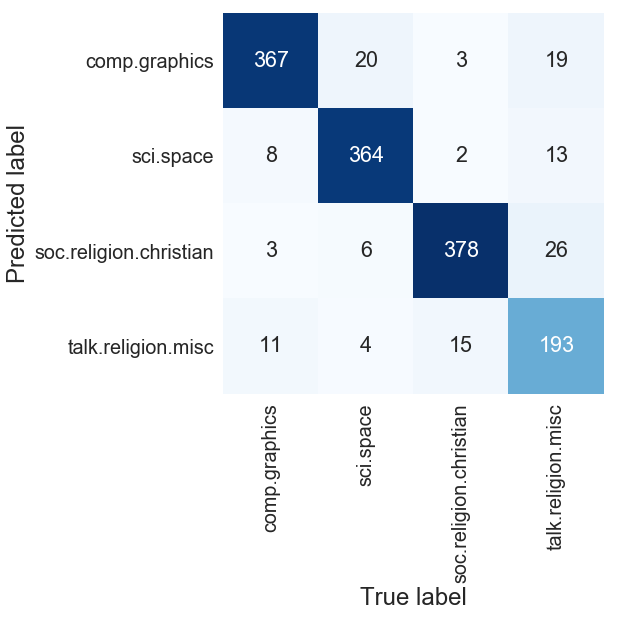

In [48]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
plt.savefig("confusion_matrix_text_classification_softmax.png", dpi=600)
plt.show()

In [49]:
# Calculate accuracy of class predictions.
accuracy_score(test.target, labels)

0.909217877094972

In [50]:
# Print classification report.
print(classification_report(test.target, labels))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       389
           1       0.94      0.92      0.93       394
           2       0.92      0.95      0.93       398
           3       0.87      0.77      0.81       251

   micro avg       0.91      0.91      0.91      1432
   macro avg       0.90      0.90      0.90      1432
weighted avg       0.91      0.91      0.91      1432



In [54]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [55]:
multiclass_roc_auc_score(test.target, labels)

0.9330372326205808